In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')
train


,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품,1,90000,9000,3,1,81000
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품,1,39000,3900,1,1,35100
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화,1,175000,17500,3,1,157500
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화,1,455000,45500,3,1,409500
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품,0,100000,10000,3,1,90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036648,29998,2001-01-21 13:20,무역점,4241080013074,바닐라,영캐주얼,트랜디 케쥬얼,여성의류,0,120000,0,3,0,120000
1036649,29998,2001-04-07 16:33,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품,0,38000,1900,1,0,36100
1036650,29999,2001-03-21 18:03,천호점,4109290004000,루이까또즈,핸드백,핸드백,잡화,0,46000,2300,1,0,43700
1036651,29999,2001-03-29 18:23,천호점,4139350206500,소피에르핀,넥타이,셔츠,남성의류,0,49000,2450,1,0,46550


In [4]:
#환불 내역
train_refund = train[train["amount"]<0]
train_refund

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
18,1,2000-06-17 12:30,본점,4234190015074,바바라,란제리,내의란제리,여성의류,1,-35000,0,1,1,-35000
21,1,2000-06-30 11:20,본점,4229811011200,시슬리,영트랜드,영트렌디,아동,0,-73000,-3650,3,1,-69350
39,2,2000-08-27 19:01,무역점,4301000017000,노티카,트래디셔널,트래디셔널,스포츠캐주얼,0,-434500,-43450,1,1,-391050
46,2,2001-01-03 10:50,무역점,4502161930200,삼성,가전특정,가전,가정용품,0,-1416000,0,6,1,-1416000
60,3,2000-08-27 11:43,천호점,4405620111000,지오다노,영캐쥬얼,영트랜디,영플라자,0,-74600,-3730,3,0,-70870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036572,29995,2000-10-22 14:00,본점,4202285110000,텔레그라프,하이캐쥬얼,여성캐주얼,여성의류,0,-1206000,-60300,1,1,-1145700
1036604,29996,2001-02-15 19:12,무역점,4123660005900,메트로씨티,핸드백,핸드백,명품,0,-205000,-20500,1,0,-184500
1036606,29996,2001-02-21 13:00,무역점,4202204013074,쥬크,영캐주얼,트랜디 케쥬얼,여성의류,0,-156000,0,1,0,-156000
1036614,29996,2001-03-23 12:52,무역점,4123660005900,메트로씨티,핸드백,핸드백,잡화,0,-195000,-19500,1,0,-175500


In [6]:
# 브랜드별 환불 횟수
a1 = train_refund.groupby("brand").count()
a1

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,207,207,207,207,207,207,207,207,207,207,207,207,207
1492,50,50,50,50,50,50,50,50,50,50,50,50,50
1492마일즈,94,94,94,94,94,94,94,94,94,94,94,94,94
3N,2,2,2,2,2,2,2,2,2,2,2,2,2
96NY,284,284,284,284,284,284,284,284,284,284,284,284,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라행사,4,4,4,4,4,4,4,4,4,4,4,4,4
휴고보스,41,41,41,41,41,41,41,41,41,41,41,41,41
휴먼앤휴먼,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
a_1 = a1.sort_values('amount', ascending=False).head(5)
a_1

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765
지오다노,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
폴로,851,851,851,851,851,851,851,851,851,851,851,851,851
시슬리,598,598,598,598,598,598,598,598,598,598,598,598,598
시스템,580,580,580,580,580,580,580,580,580,580,580,580,580


In [9]:
a_1.index

Index(['식품', '지오다노', '폴로', '시슬리', '시스템'], dtype='object', name='brand')

In [11]:
a_1["custid"]

brand
식품      1765
지오다노    1112
폴로       851
시슬리      598
시스템      580
Name: custid, dtype: int64

In [13]:
# 브랜드별 거래 횟수
a2 = train.groupby("brand").count()
a2

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562
1492,768,768,768,768,768,768,768,768,768,768,768,768,768
1492마일즈,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199
3N,22,22,22,22,22,22,22,22,22,22,22,22,22
96NY,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라행사,34,34,34,34,34,34,34,34,34,34,34,34,34
휴고보스,414,414,414,414,414,414,414,414,414,414,414,414,414
휴먼앤휴먼,11,11,11,11,11,11,11,11,11,11,11,11,11


In [15]:
#브랜드별 환불 비율
k = a1/a2
k

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796
1492,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104
1492마일즈,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399
3N,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
96NY,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라행사,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647
휴고보스,0.099034,0.099034,0.099034,0.099034,0.099034,0.099034,0.099034,0.099034,0.099034,0.099034,0.099034,0.099034,0.099034
휴먼앤휴먼,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909


In [16]:
k.head(5)

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796,0.080796
1492,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104,0.065104
1492마일즈,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399,0.078399
3N,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
96NY,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695,0.130695


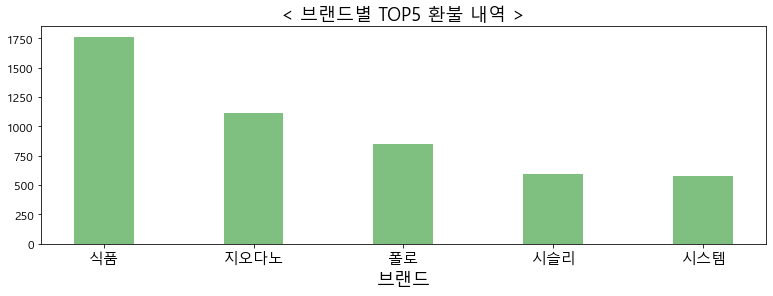

In [12]:
#막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = a_1.index       # x축 항목
y = a_1["custid"] #s1 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 브랜드별 TOP5 환불 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()